 # Finding olympic winner

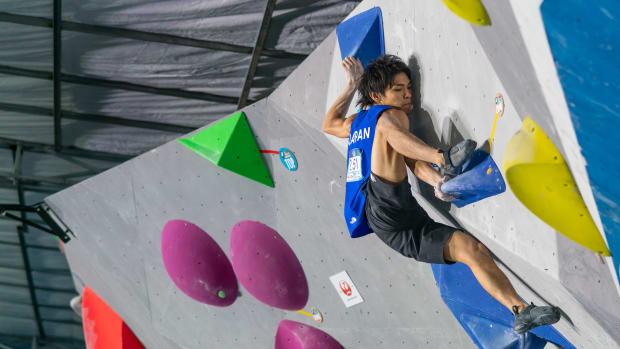



The final standings at the end of the event will be determined by a multiplied score of athletes' placements in all three disciplines—with the lowest score earning the gold medal.

Speed(placement) x Bouldering(placement) x Lead(placement)=overall->lowest=winner

Soo its important too be good at least 2 disciplines and most climbers are combining well lead and bouldering soo we will find 3 best mens and womens and we will compare their results(speed-we will get from olympic qualification) and then overall score. Then we will see predictions for olympic games

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:

# Load in data
boulder = pd.read_csv('/kaggle/input/ifsc-sport-climbing-competition-results/boulder_results.csv')
lead = pd.read_csv('/kaggle/input/ifsc-sport-climbing-competition-results/lead_results.csv')
combined = pd.read_csv('/kaggle/input/ifsc-sport-climbing-competition-results/combined_results.csv')

In [ ]:
boulder = boulder[~boulder['Competition Title'].str.contains('Youth')]
lead = lead[~lead['Competition Title'].str.contains('Youth')]
combined = combined[combined['Competition Title'].str.contains('Hachioji')]#most usefull qulification

#Split male and female bouldering competitors
#In each competition there are first listed females, then males
#They are ranked in order from 1 up
male = True
isMale = []
for index, climber in boulder.iterrows():
    if climber['Rank'] == 1:
        male = not male
    isMale.append(male)
boulder_mal = boulder[isMale]
boulder_fem=boulder[~boulder.isin(boulder_mal)]
boulder_fem = boulder_fem.dropna(how='all')

#Split male and female lead competitors
#In each competition there are first listed females, then males
#They are ranked in order from 1 up
male = True
isMale = []
for index, climber in lead.iterrows():
    if climber['Rank'] == 1:
        male = not male
    isMale.append(male)
lead_mal = lead[isMale]
lead_fem=lead[~lead.isin(lead_mal)]
lead_fem = lead_fem.dropna(how='all')
#making assumption that medal wont go to speed specialist(in bonus i will make agrument for that)

In [ ]:
#more than 3 competions(competitors for olympic medal need consistency)
boulder_mal_top = boulder_mal.groupby(['FIRST', 'LAST'])['Rank'].agg(['mean', 'count']).reset_index().sort_values('mean')
boulder_mal_top = boulder_mal_top[(boulder_mal_top['count']>3) & (boulder_mal_top['mean']<15)]
boulder_mal_top.insert(3, 'Rank', range(1, 1+len(boulder_mal_top)))
boulder_mal_top=boulder_mal_top.drop(columns =['mean', 'count'])



boulder_fem_top = boulder_fem.groupby(['FIRST', 'LAST'])['Rank'].agg(['mean', 'count']).reset_index().sort_values('mean')
boulder_fem_top = boulder_fem_top[(boulder_fem_top['count']>3) & (boulder_fem_top['mean']<15)]
boulder_fem_top.insert(3, 'Rank', range(1,1+ len(boulder_fem_top)))
boulder_fem_top=boulder_fem_top.drop(columns =['mean', 'count'])


#More competisions and just finals higer requriments
lead_mal_top = lead_mal.groupby(['FIRST', 'LAST'])['Rank'].agg(['mean', 'count']).reset_index().sort_values('mean')
lead_mal_top = lead_mal_top[(lead_mal_top['count']>5) & (lead_mal_top['mean']<15)]
lead_mal_top .insert(3, 'Rank1', range(1, 1+len(lead_mal_top )))
lead_mal_top =lead_mal_top .drop(columns =['mean', 'count'])




lead_fem_top = lead_fem.groupby(['FIRST', 'LAST'])['Rank'].agg(['mean', 'count']).reset_index().sort_values('mean')
lead_fem_top = lead_fem_top[(lead_fem_top['count']>5) & (lead_fem_top['mean']<15)]
lead_fem_top.insert(3, 'Rank1', range(1, 1+len(lead_fem_top)))
lead_fem_top = lead_fem_top.drop(columns =['mean', 'count'])



#get speeed climbing results from best allround climbers-we need just comparison soo we dont need split data into male/female
combined['Qualification speed'] = combined['Qualification speed'].str[:-1]
combined['Qualification speed'] = combined['Qualification speed'].astype(float)
combined=combined.sort_values(by=['Qualification speed'])
combined.insert(4, 'Rank2', range(1, 1+len(combined)))
combined = combined.groupby(['FIRST', 'LAST'])['Rank2'].agg(['mean', 'count']).reset_index().sort_values('mean')
combined.insert(4, 'Rank2', range(1, 1+len(combined)))
combined = combined.drop(columns =['mean', 'count'])

In [ ]:
temp_mal = pd.merge(lead_mal_top, boulder_mal_top, on=["FIRST", "LAST"])
temp_fem = pd.merge(lead_fem_top, boulder_fem_top, on=["FIRST", "LAST"])


final_mal = pd.merge(temp_mal, combined, on=["FIRST", "LAST"])
final_fem = pd.merge(temp_fem, combined, on=["FIRST", "LAST"])

final_mal=final_mal.sort_values(by=['Rank'])
final_mal.insert(5, 'Bouldering', range(1, 1+len(final_mal)))
final_mal=final_mal.sort_values(by=['Rank1'])
final_mal.insert(6, 'Lead', range(1, 1+len(final_mal)))
final_mal=final_mal.sort_values(by=['Rank2'])
final_mal.insert(7, 'Speed', range(1, 1+len(final_mal)))
final_mal = final_mal.drop(columns =['Rank', 'Rank1', 'Rank2'])
final_mal['Overall']=final_mal['Speed']*final_mal['Lead']*final_mal['Bouldering']
final_mal=final_mal.sort_values(by=['Overall'],ascending=True)
final_mal['Name']=final_mal['FIRST'] +' '+ final_mal['LAST']


final_fem=final_fem.sort_values(by=['Rank'])
final_fem.insert(5, 'Bouldering', range(1, 1+len(final_fem)))
final_fem=final_fem.sort_values(by=['Rank1'])
final_fem.insert(6, 'Lead', range(1, 1+len(final_fem)))
final_fem=final_fem.sort_values(by=['Rank2'])
final_fem.insert(7, 'Speed', range(1, 1+len(final_fem)))
final_fem = final_fem.drop(columns =['Rank', 'Rank1', 'Rank2'])
final_fem['Overall']=final_fem['Speed']*final_mal['Lead']*final_fem['Bouldering']
final_fem.sort_values(by=['Overall'],ascending=True)
final_fem['Name']=final_fem['FIRST'] +' '+ final_fem['LAST']

ax = final_mal.plot.bar(x='Name', y='Overall', rot=0)
ax = final_fem.plot.bar(x='Name', y='Overall', rot=0)
print(final_fem)
print(final_mal)

**It looks like Tomoa Narasaki and Adam Ondra will fight for gold medal in mens category**

**And if everything goes acorrding expectations Janja will dominate.**

*Unfortunately we wont see Lučka Rakovec and Kokoro Fuji in Tokyo duo too limit of nation representation.*


